In [133]:
import pandas as pd

data = pd.read_csv("../data/AAPL_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1509 non-null   object 
 1   Open          1509 non-null   float64
 2   High          1509 non-null   float64
 3   Low           1509 non-null   float64
 4   Close         1509 non-null   float64
 5   Volume        1509 non-null   int64  
 6   Dividends     1509 non-null   float64
 7   Stock Splits  1509 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 94.4+ KB


In [134]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,36.985087,37.930669,36.827490,37.708599,148158800,0.0,0.0
1,2019-01-03 00:00:00-05:00,34.379969,34.795453,33.907180,33.952549,365248800,0.0,0.0
2,2019-01-04 00:00:00-05:00,34.511295,35.471204,34.336985,35.401955,234428400,0.0,0.0
3,2019-01-07 00:00:00-05:00,35.507022,35.538065,34.838429,35.323158,219111200,0.0,0.0
4,2019-01-08 00:00:00-05:00,35.712373,36.252024,35.464040,35.996525,164101200,0.0,0.0


In [135]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03,1509.000000,1509.000000
mean,135.071354,136.555958,133.714875,135.217730,9.420629e+07,0.003501,0.002651
std,54.121910,54.570982,53.708927,54.178990,5.233248e+07,0.027666,0.102971
min,34.379969,34.795453,33.907180,33.952549,2.323470e+07,0.000000,0.000000
25%,88.915255,90.247793,88.250234,88.876297,5.914450e+07,0.000000,0.000000
50%,143.439508,145.133791,141.887953,143.587448,8.153200e+07,0.000000,0.000000
75%,172.287775,173.921376,170.578985,172.447479,1.124244e+08,0.000000,0.000000
max,258.190002,260.100006,257.630005,259.019989,4.265100e+08,0.250000,4.000000


In [136]:
#Feature Engineering: Lagged Features
for lag in range(1, 6):  #Lag of 1 to 5 days
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)

#Technical Indicators: RSI and MACD
import ta  

data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
data['MACD'] = ta.trend.MACD(close=data['Close']).macd()

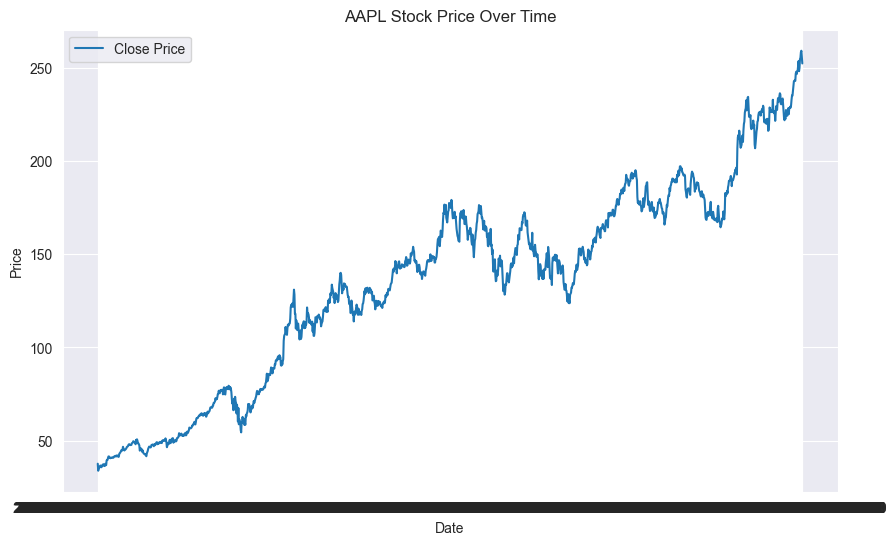

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close'], label = 'Close Price')
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

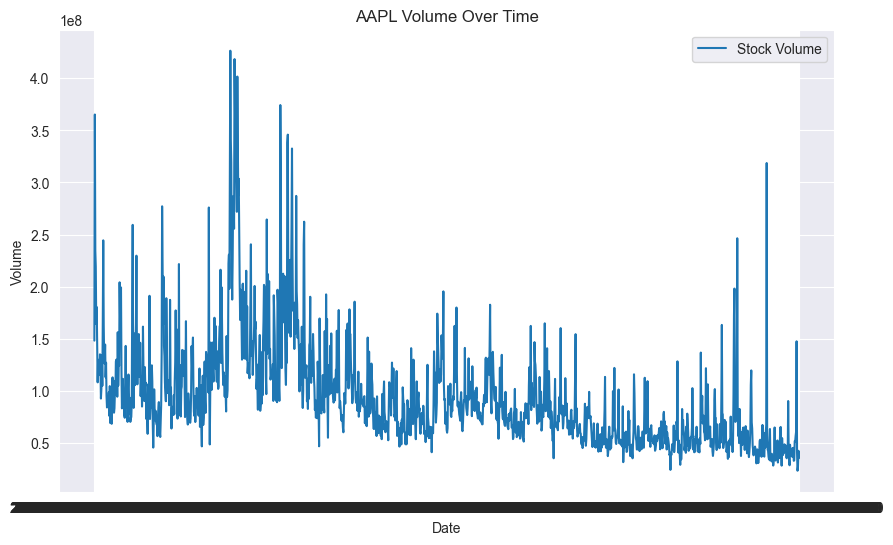

In [138]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Volume'], label = 'Stock Volume')
plt.title("AAPL Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

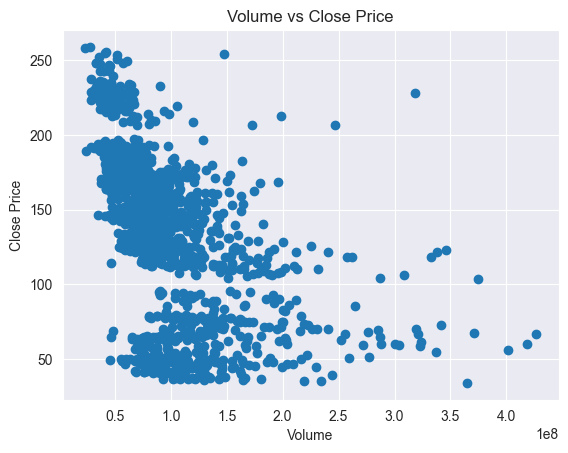

In [139]:
plt.scatter(data['Volume'], data['Close'])
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

In [140]:
corr_matrix = data.select_dtypes(include = 'number').corr()
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,RSI,MACD
Open,1.000000,0.999690,0.999686,0.999319,-0.531216,0.012036,-0.005013,0.999585,0.998535,0.997509,0.996650,0.995771,-0.104349,0.171351
High,0.999690,1.000000,0.999595,0.999686,-0.524615,0.011246,-0.004096,0.999395,0.998418,0.997505,0.996634,0.995782,-0.103932,0.168969
Low,0.999686,0.999595,1.000000,0.999685,-0.538207,0.012042,-0.005140,0.999285,0.998203,0.997148,0.996239,0.995292,-0.096419,0.173791
Close,0.999319,0.999686,0.999685,1.000000,-0.531786,0.011762,-0.004399,0.998973,0.997978,0.997039,0.996150,0.995232,-0.095897,0.171435
Volume,-0.531216,-0.524615,-0.538207,-0.531786,1.000000,-0.024073,0.064727,-0.530432,-0.528556,-0.525181,-0.523419,-0.521385,-0.028427,-0.075474
Dividends,0.012036,0.011246,0.012042,0.011762,-0.024073,1.000000,-0.003259,0.011678,0.011715,0.010263,0.009096,0.009410,0.004821,0.010012
Stock Splits,-0.005013,-0.004096,-0.005140,-0.004399,0.064727,-0.003259,1.000000,-0.006337,-0.006215,-0.005481,-0.006244,-0.005733,0.046125,0.059607
Close_Lag_1,0.999585,0.999395,0.999285,0.998973,-0.530432,0.011678,-0.006337,1.000000,0.998971,0.997977,0.997034,0.996140,-0.110536,0.168839
Close_Lag_2,0.998535,0.998418,0.998203,0.997978,-0.528556,0.011715,-0.006215,0.998971,1.000000,0.998969,0.997971,0.997024,-0.124167,0.163554
Close_Lag_3,0.997509,0.997505,0.997148,0.997039,-0.525181,0.010263,-0.005481,0.997977,0.998969,1.000000,0.998966,0.997966,-0.136505,0.156308


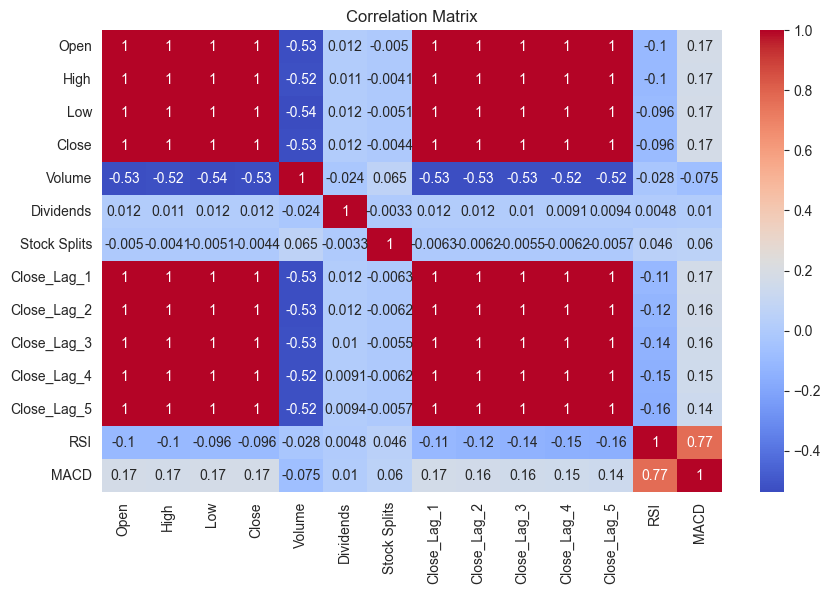

In [141]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

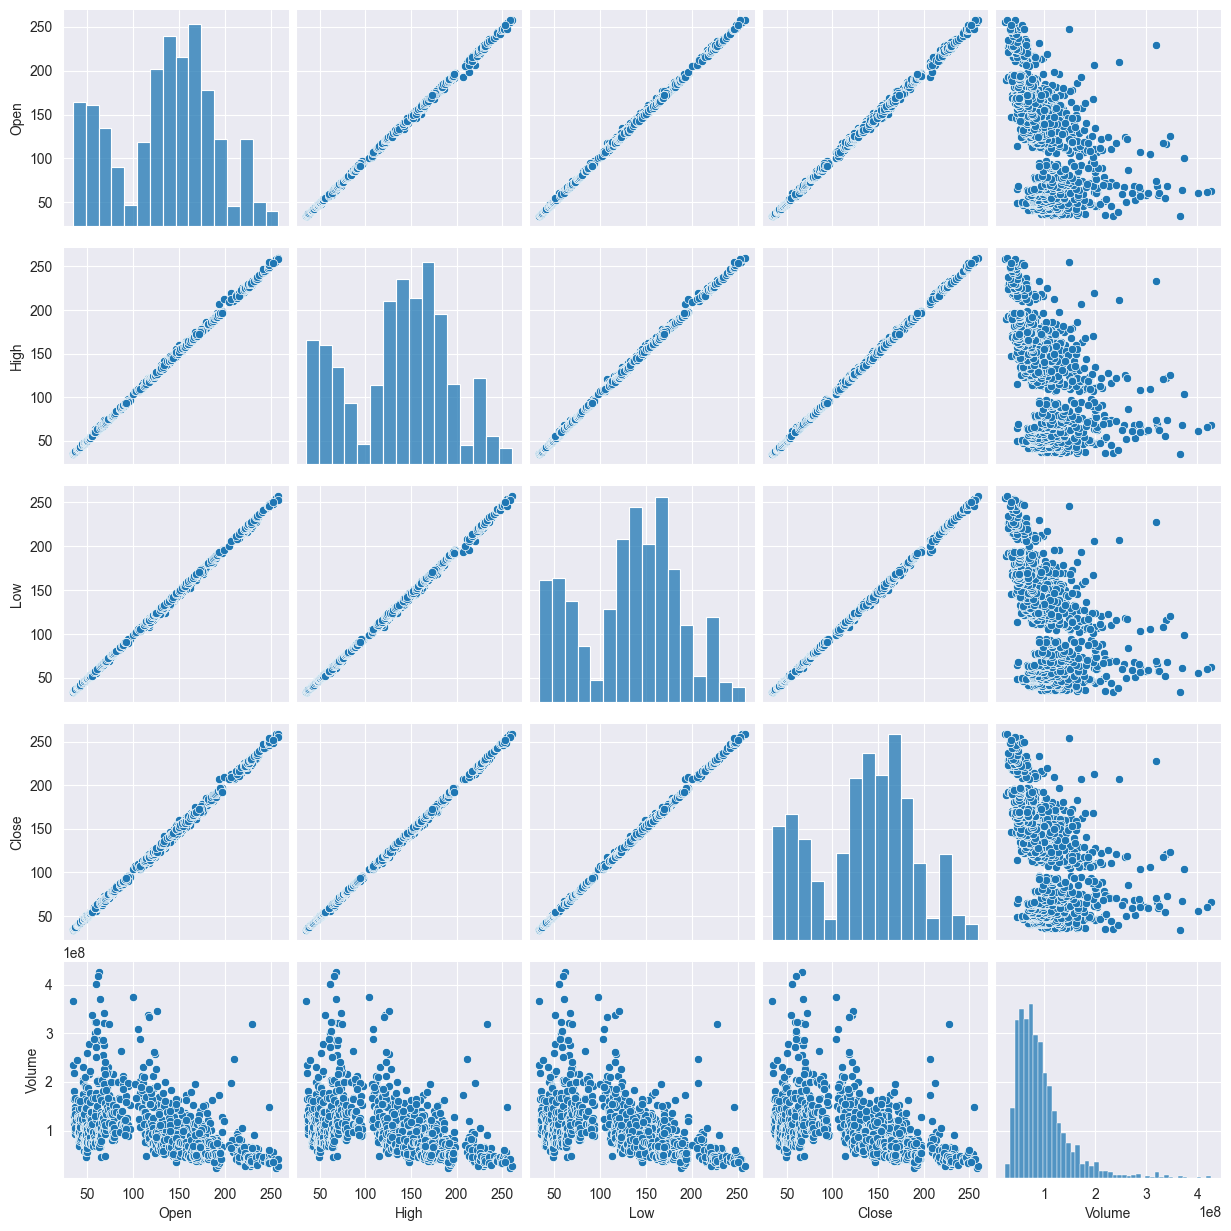

In [142]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])

<Axes: >

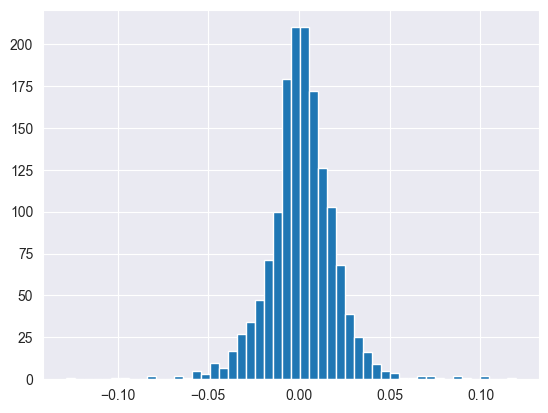

In [143]:
data['Daily_Return'] = data['Close'].pct_change()
data['Daily_Return'].hist(bins=50)

<Axes: >

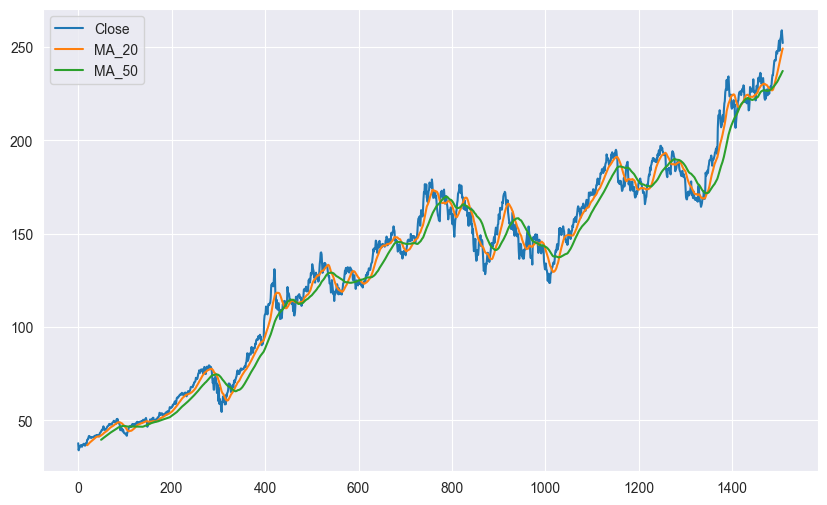

In [144]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA_20', 'MA_50']].plot(figsize=(10, 6))

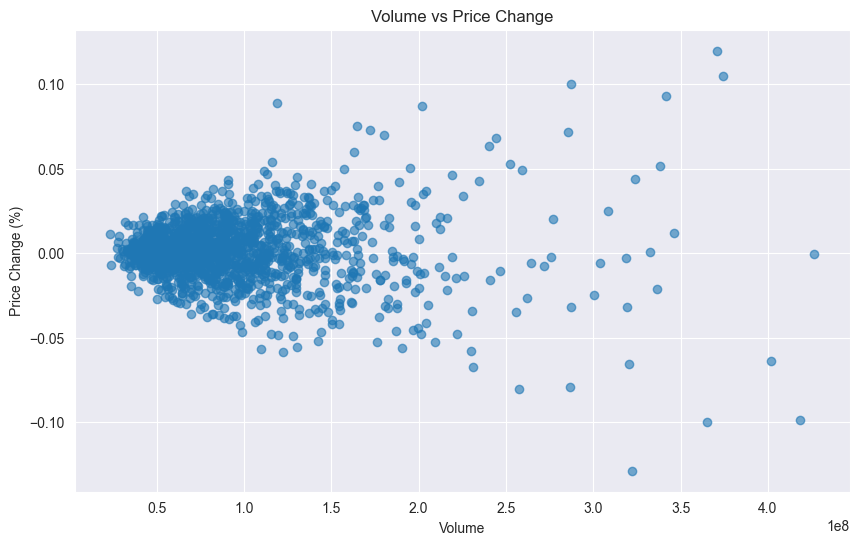

In [145]:
high_volume_days = data.sort_values(by='Volume', ascending=False).head(10)

data['Price_Change'] = data['Close'].pct_change()

#Scatter plot of Volume vs Price Change
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Price_Change'], alpha=0.6)
plt.title('Volume vs Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change (%)')
plt.show()

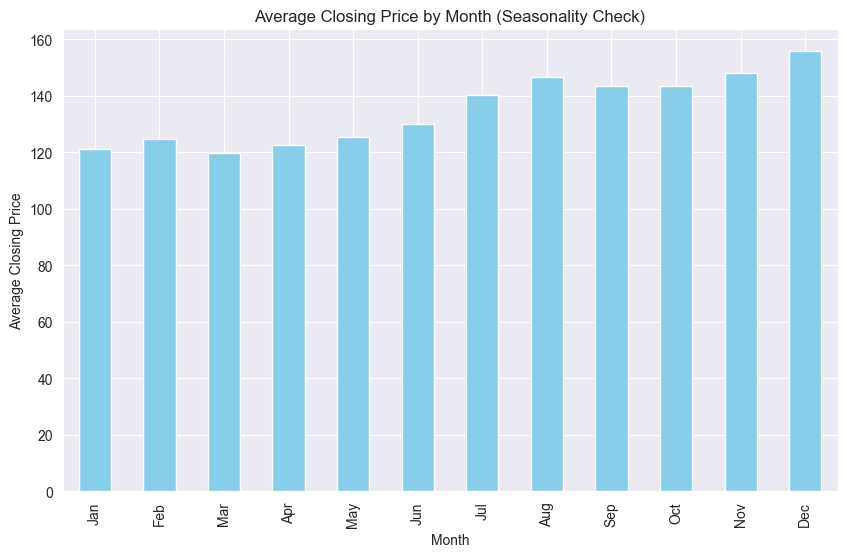

In [146]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', utc = True)
data['Month'] = data['Date'].dt.month

#Group by Month across all years
monthly_avg = data.groupby('Month')['Close'].mean()

#Plot the average closing price by month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Closing Price by Month (Seasonality Check)')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

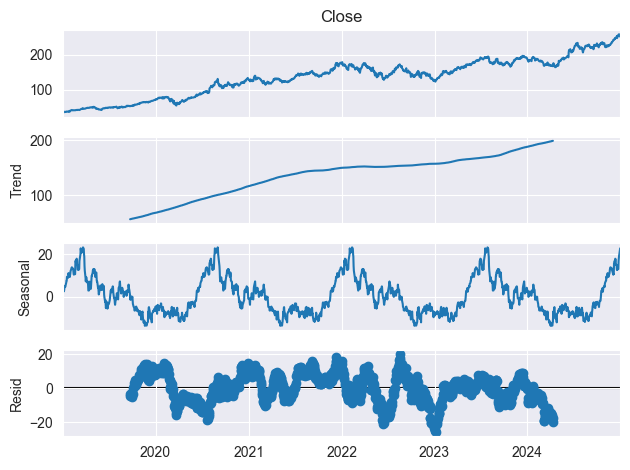

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Ensure the Date column is set as the index for time-series decomposition
decomp_data = data.copy()
decomp_data.set_index('Date', inplace=True)

#Perform seasonal decomposition on the 'Close' prices
decompose_result = seasonal_decompose(decomp_data['Close'], model='additive', period=365)

#Plot the decomposition results
decompose_result.plot()
plt.show()

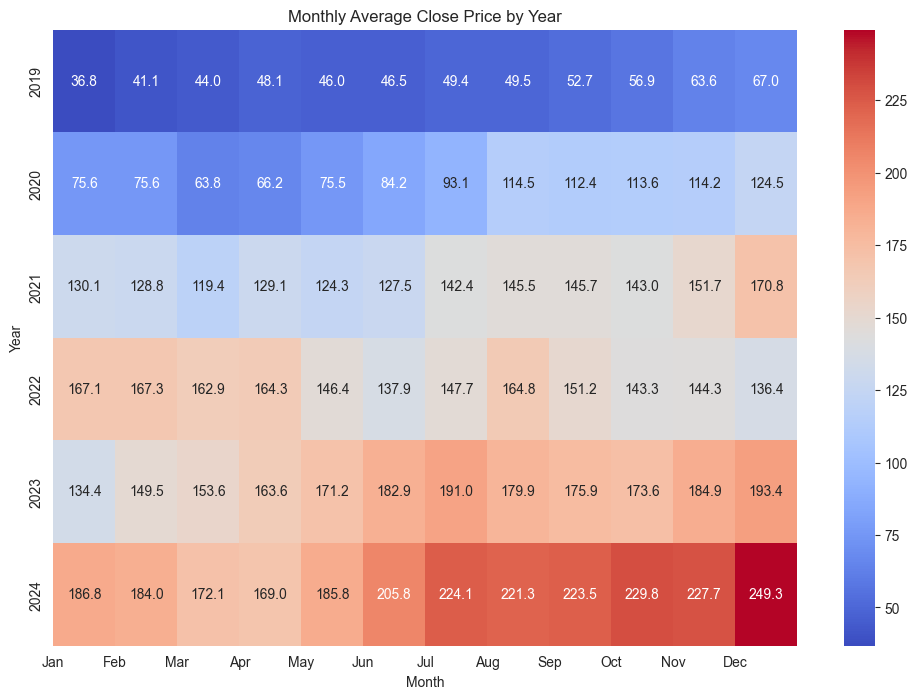

In [148]:
data['Year'] = data['Date'].dt.year

#Group by Year and Month to calculate averages
year_month_avg = data.groupby(['Year', 'Month'])['Close'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(year_month_avg, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Monthly Average Close Price by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()